# Lecture 3

(Summer 2022)

## Outline of topics for this segment:

1. Programming the chutes and ladders game
2. Experimenting with it
3. HW: Program up the game of war


In [1]:
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## The Chutes and Ladders Game ...

Prof. Buckmaster introduced the chutes and ladders game as an example of computing using Excel. The typical game board, containing 100 squares, is shown below.

<img align="left" src='Figs/Chutes&LaddersImage.png' width="500"/>

### Short version of the rules:

1. Assume there are N players, who have been ordered according to the order in which they will play by some random means (e.g., by rolling the dice, drawing straws, etc.)

2. Players all start at position 0.

3. At time k (k = 0, 1, 2, ...) the positions of the N players are indicated by p_n(k) for n = 1, 2, 3, ..., N.

4. Starting with player 1, each player throws a die and adds the value shown on the die to his position, i.e., p_1(k+1) = p_1(k) + {the roll of the die}. Then the player moves to that position on the board. If there is no chute or ladder at the new position, he remains there and his turn ends. On the other hand, if there is a chute or a ladder at the new position, the player must climb the ladder or fall down the chute as the case may be .... this change then yields the new position.

5. The first player to reach position 100 exactly wins the game. If a player rolls the die and computes a new position that would take her past 100, then the roll is voided and she remains at her original position.

### Following is a function which rolls the die and computes the new position of a player.

In [2]:
# This dictionary stores the chutes and ladders board.
CandLTable = {1:38, 4:14, 9:31, 16:6, 21:42, 28:84, 36:44, 47:26, 49:11, 51:67,
             56:53, 63:19, 64:60, 71:91, 80:100, 87:24, 93:73, 95:75, 98:78}

# The function to make a move
def CandL_make_a_move(position,CandLTable):
    roll = np.random.randint(1,6)
    if position + roll > 100:
        return position
    position += roll
    position = CandLTable.get(position, position)
    return position

### How does the `CandLTable` work?

It is a dictionary, which means a collection of key-value pairs. Here is a link to `methods` that work with dictionaries ... <a href="https://www.w3schools.com/python/python_ref_dictionary.asp" target="_blank">Dictionary Methods</a>.

Let's try a few ...

In [3]:
print(CandLTable.keys())

dict_keys([1, 4, 9, 16, 21, 28, 36, 47, 49, 51, 56, 63, 64, 71, 80, 87, 93, 95, 98])


In [4]:
print(CandLTable.values())

dict_values([38, 14, 31, 6, 42, 84, 44, 26, 11, 67, 53, 19, 60, 91, 100, 24, 73, 75, 78])


In [5]:
print(CandLTable.items())

dict_items([(1, 38), (4, 14), (9, 31), (16, 6), (21, 42), (28, 84), (36, 44), (47, 26), (49, 11), (51, 67), (56, 53), (63, 19), (64, 60), (71, 91), (80, 100), (87, 24), (93, 73), (95, 75), (98, 78)])


In [6]:
# Simplest usage, good for when we know that the referenced key exists ...
CandLTable.get(49)

11

In [7]:
# What happens if the key does not exist in the dictionary?
CandLTable.get(48)

### Nothing happens apparently

In [8]:
# Sometimes you can use print() to force the interpreter to show a value ...
print(CandLTable.get(48))

None


### This is why we need the second argument in the call to the dictionary. It specifies what to return in the case that the key is missing ...

In [9]:
# Specifying a second argument in the call
print(CandLTable.get(48,-1))

-1


### How does `random` work?

Random number generators are covered in many places ... <a href="https://numpy.org/doc/stable/reference/random/index.html?highlight=random%20sampling%20numpy%20random#module-numpy.random" target="_blank">Random Numbers in NumPy</a>.

In [10]:
print(np.random.randint(1,6))

3


In [11]:
np.random.seed(12345)
print(np.random.randint(1,6))
print(np.random.randint(1,6))
print(np.random.randint(1,6))
print(np.random.randint(1,6))
print(np.random.randint(1,6))
print(np.random.randint(1,6))

3
2
5
2
3
2


# Program Chutes and Ladders Game

Write a program which plays a game between two people until one wins and produces a record of the game play.

Convert your the single game code into a function and then write a program to play a large number of games one after another keeping a record of who won and how long the game lasted. Then compute statistics and/or histograms.

Finally, explore how changes to the positions of chutes and ladders might change the game.

### Basic Game

Player 1 Wins!!


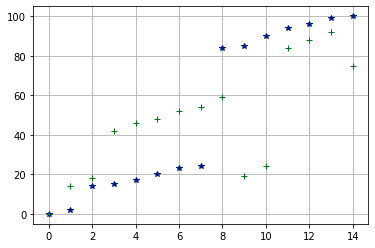

In [12]:
P1 = np.array([0])
P2 = np.array([0])

p1 = 0
p2 = 0

while (p1 < 100 and p2 < 100):
    p1 = CandL_make_a_move(p1, CandLTable)
    p2 = CandL_make_a_move(p2, CandLTable)
    P1 = np.append(P1, p1)
    P2 = np.append(P2, p2)
    if p1 == 100:
        print('Player 1 Wins!!')
    elif p2 == 100:
        print('Player 2 Wins!!')

# This simply plots the positions of the two players over the
# course of the game.
fig3 = plt.figure()
plt.style.use('seaborn-dark-palette')
plt.plot(P1,'*')
plt.plot(P2,'+')
plt.grid()

### Playing many games

Average number of rounds per game is 30.25
Player 1 won 497 of 1000 games
Player 2 won 503 of 1000 games


(array([ 60., 113., 136.,  80., 112., 107.,  52.,  83.,  63.,  27.,  32.,
         34.,  15.,  17.,  19.,   8.,   8.,  14.,   5.,   2.,   2.,   3.,
          3.,   2.,   1.,   1.,   0.,   0.,   0.,   1.]),
 array([  8. ,  11.7,  15.4,  19.1,  22.8,  26.5,  30.2,  33.9,  37.6,
         41.3,  45. ,  48.7,  52.4,  56.1,  59.8,  63.5,  67.2,  70.9,
         74.6,  78.3,  82. ,  85.7,  89.4,  93.1,  96.8, 100.5, 104.2,
        107.9, 111.6, 115.3, 119. ]),
 <BarContainer object of 30 artists>)

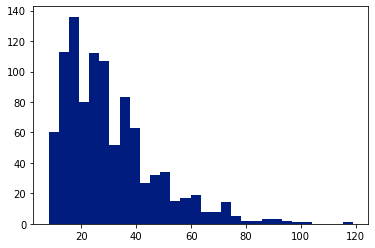

In [13]:
# Convert game code to function

def CandL_play_a_game(CandLTable):
    p1 = 0
    p2 = 0
    Nmoves = 0
    p1wins = 0
    p2wins = 0
    while (p1 < 100 and p2 < 100):
        p1 = CandL_make_a_move(p1, CandLTable)
        p2 = CandL_make_a_move(p2, CandLTable)
        Nmoves += 1
        if p1 == 100:
            p1wins += 1
        elif p2 == 100:
            p2wins += 1
    return Nmoves, p1wins, p2wins
     
Ngames = 1000
Np1wins = 0
Np2wins = 0

GameLengths = np.array([])

for k in range(Ngames):
    L = CandL_play_a_game(CandLTable)
    Np1wins += L[1]
    Np2wins += L[2]
    GameLengths = np.append(GameLengths, L[0])

print('Average number of rounds per game is {:.2f}'.format(np.mean(GameLengths)))
print('Player 1 won {} of {} games'.format(Np1wins,Ngames))
print('Player 2 won {} of {} games'.format(Np2wins,Ngames))

plt.hist(GameLengths, bins=30)

### Modify the table to see it's effect on the game ...

Average number of rounds per game is 158.29
Player 1 won 500 of 1000 games
Player 2 won 500 of 1000 games


(array([155., 157., 136., 122.,  88.,  60.,  62.,  37.,  42.,  29.,  19.,
         14.,  12.,   9.,  13.,   6.,   6.,   8.,   5.,   5.,   6.,   2.,
          1.,   0.,   2.,   1.,   1.,   0.,   0.,   2.]),
 array([ 18.        ,  47.33333333,  76.66666667, 106.        ,
        135.33333333, 164.66666667, 194.        , 223.33333333,
        252.66666667, 282.        , 311.33333333, 340.66666667,
        370.        , 399.33333333, 428.66666667, 458.        ,
        487.33333333, 516.66666667, 546.        , 575.33333333,
        604.66666667, 634.        , 663.33333333, 692.66666667,
        722.        , 751.33333333, 780.66666667, 810.        ,
        839.33333333, 868.66666667, 898.        ]),
 <BarContainer object of 30 artists>)

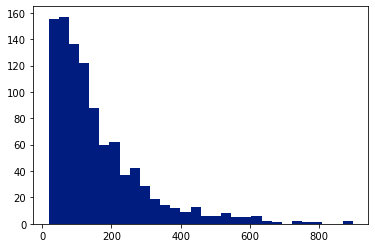

In [14]:
# This dictionary stores the chutes and ladders board.
CandLTable2 = {4:14, 9:31, 16:6, 21:42, 36:44, 47:26, 49:11, 51:67,
             56:53, 63:19, 64:60, 80:2, 87:24, 93:73, 95:75, 98:78}

Ngames = 1000
Np1wins = 0
Np2wins = 0

GameLengths = np.array([])

for k in range(Ngames):
    L = CandL_play_a_game(CandLTable2)
    Np1wins += L[1]
    Np2wins += L[2]
    GameLengths = np.append(GameLengths, L[0])
    
print('Average number of rounds per game is {:.2f}'.format(np.mean(GameLengths)))
print('Player 1 won {} of {} games'.format(Np1wins,Ngames))
print('Player 2 won {} of {} games'.format(Np2wins,Ngames))

plt.hist(GameLengths, bins=30)

# War!

<a href="https://bicyclecards.com/how-to-play/war/" target="_blank">The War Card Game</a>.

Need a data structure to hold the state of a players cards ... 

Could number the cards from top to bottom (13 = A, 12 = K, 11 = Q, 10 = J, 9 = 10, 8 = 9, 7 = 8, 6 = 7, 5 = 6, 4 = 5, 3 = 4, 2 = 3, 1 = 2 ...

There are four suites meaning each of the numbers above is repeated 4 times. All are equivalent.

Need a routine to shuffle a list ...

### Following are some code snippets I've explored for trying to build a war game .... It's not finished, by the way.

In [15]:
import random

In [16]:
fulldeck = [13, 13, 13, 13, 12, 12, 12, 12, 11, 11, 11, 11, 10, 10, 10, 10, 9, 9, 9, 9, 8, 8, 8, 8, 7, 7, 7, 7,
           6, 6, 6, 6, 5, 5, 5, 5, 4, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1]

In [17]:
random.shuffle(fulldeck)

In [18]:
player1 = fulldeck[0:52:2]
player2 = fulldeck[1:52:2]

In [19]:
print(len(player1))
print(player1)
print(len(player2))
print(player2)

26
[1, 6, 3, 12, 10, 2, 11, 5, 4, 11, 9, 5, 2, 8, 3, 9, 13, 10, 2, 5, 2, 13, 8, 11, 1, 10]
26
[9, 7, 6, 12, 6, 5, 6, 4, 13, 7, 8, 10, 4, 11, 9, 12, 1, 8, 3, 7, 3, 12, 1, 13, 4, 7]


Now I need a function that compares two lists and plays the game ...

In [20]:

newplayer1 = [];
newplayer2 = [];

K = min(len(player1),len(player2))
#L = max(len(player1),len(player2))

for n in range(K):
    
    if player1[0] <= player2[0]:
        newplayer2.append(player1[0])
        newplayer2.append(player2[0])
    else:
        newplayer1.append(player2[0])
        newplayer1.append(player1[0])
        
    del player1[0]
    del player2[0]
        
#    n = n + 1
    
player1 = newplayer1 + player1;
player2 = newplayer2 + player2;

print(len(player1))
print(player1)
print(len(player2))
print(player2)
    

20
[6, 10, 6, 11, 4, 5, 7, 11, 8, 9, 1, 13, 8, 10, 12, 13, 1, 8, 7, 10]
32
[1, 9, 6, 7, 3, 6, 12, 12, 2, 5, 4, 13, 5, 10, 2, 4, 8, 11, 3, 9, 9, 12, 2, 3, 5, 7, 2, 3, 11, 13, 1, 4]


### There's plenty of work remaining to figure out the game:

* How to handle ties that make wars?
* What to do as one player's card list gets short? Maybe they won't have enough cards to complete the war.
* How to build the code to run many games to look at statistics for winning and losing?
* How to answer a question such as: Given I'm down to only 10 cards, what are my odds of coming back and winning?